# Trabalho em Grupo II

```
Disciplina: Inteligência artificial 6º semestre
IFSP campus Campinas
Alunos: 
- Paulo Henrique Belucci - CP3001369
- Silvio da Col de Brito - CP300130X
Prof.: Dr. Samuel Martins
```

## Predição - Pandemia do Corona vírus no Brasil

---

### Descrição e motivação

A pandemia do Corona vírus teve início ao final do ano 2019 e, em pouco mais de um ano, é responsável por mais de 1,4 milhão de mortes em todo o mundo. Seus sintomas são parecidos com os sintomas da gripe, com destaque para a síndrome respiratória. Embora sua taxa de letalidade não seja tão alta, seu sintomas somados a um grande número de infectados tem se tornado um gravíssimo problema de saúde pública em todos os países, devido a sobrecarga de leitos de Unidade de Tratamento Intensivo (UTI) por aqueles casos se se agravam.

Muitos estudos e pesquisas tem sido desenvolvidos em prol de mapear a genética do vírus, entender as formas de contágio, testar tratamentos para pacientes infectados e, destaca-se, desenvolver uma vacina para imunizar a população interrompendo assim o ciclo de contágio.

Esta análise exploratória visa entender alguns aspectos da pandemia no Brasil, tais informações servem de insumo para elaboração de estratégias eficazes no combate ao avança da doença.



### Descrição da base de dados

O conjunto de dados foi extraído do [painel oficial](https://covid.saude.gov.br/) de COVID-19 no Brasil e cobre informações de todos os estados e municípios.

Cada registro contabiliza os casos novos, acumulados, recuperados por estado e município. A periodicidade é diária, ou seja, cada linha representa um dia.

As colunas presentes no _dataset_ são:
- regiao
- estado
- municipio
- coduf
- codmun
- codRegiaoSaude
- nomeRegiaoSaude
- data
- semanaEpi
- populacaoTCU2019
- casosAcumulado
- casosNovos
- obitosAcumulado
- obitosNovos
- Recuperadosnovos
- emAcompanhamentoNovos
- interior/metropolitana

Na sequência é realizada uma análise prévia sobre o dataset, seus tipos de dados, numero de registros, dados faltantes:

In [40]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [2]:
covid = pd.read_csv('HIST_PAINEL_COVIDBR_29jan2021.csv', delimiter=';')
covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


### Na etapa a seguir é criado um dataset com os dados do Brasil

In [88]:
covid_brasil = covid.query('regiao == "Brasil"')
covid_brasil.head(5)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [91]:
## Convertendo as datas do tipo 'object' para o tipo 'datetime'
datas = [pd.to_datetime(dt) for dt in covid_brasil.data]

covid_brasil = covid_brasil[["casosNovos", "obitosNovos"]]
covid_brasil['data'] = datas
covid_brasil.set_index('data', inplace=True)

covid_brasil.tail(5)

AttributeError: 'DataFrame' object has no attribute 'data'

<AxesSubplot:title={'center':'Casos vs Óbitos diários'}, xlabel='data'>

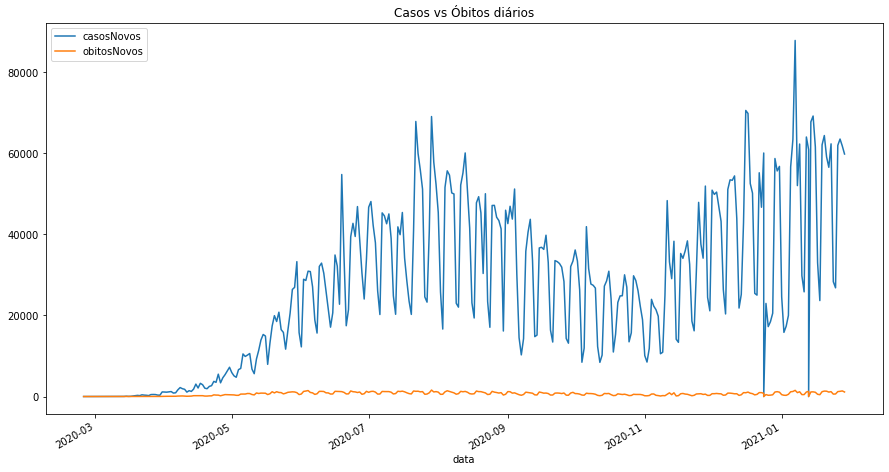

In [34]:
covid_brasil.plot(figsize=(15,8), title="Casos vs Óbitos diários")

### Um novo DataFrame é criado com a média móvel de 7 dias para atenuar as oscilações diárias 

<AxesSubplot:title={'center':'Média móvel de 7 dias'}, xlabel='data'>

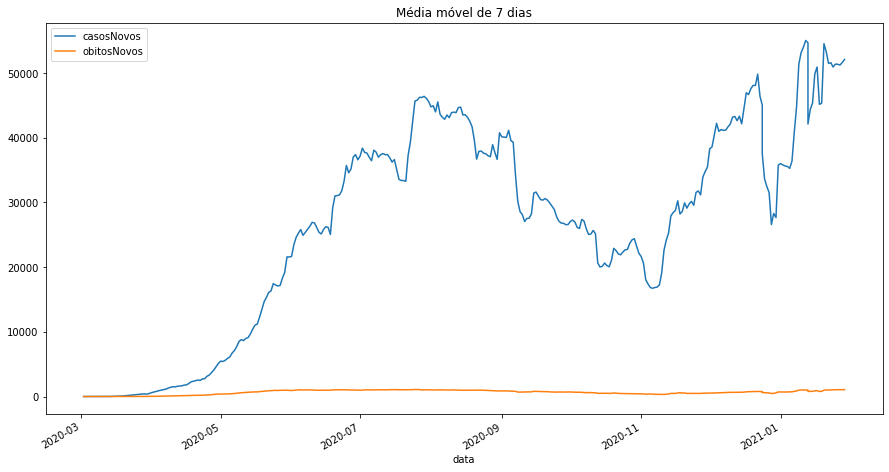

In [33]:
covid_brasil_mv = pd.DataFrame({
    "casosNovos": covid_brasil.casosNovos.rolling(window=7).mean(),
    "obitosNovos": covid_brasil.obitosNovos.rolling(window=7).mean()
})
covid_brasil_mv.set_index(covid_brasil.index)
covid_brasil_mv.plot(figsize=(15,8), title="Média móvel de 7 dias")

### Vamos verificar a correlação entre número de casos e óbitos:

In [14]:
covid_brasil_mv.corr()

,casosNovos,obitosNovos
casosNovos,1.000000,0.807726
obitosNovos,0.807726,1.000000


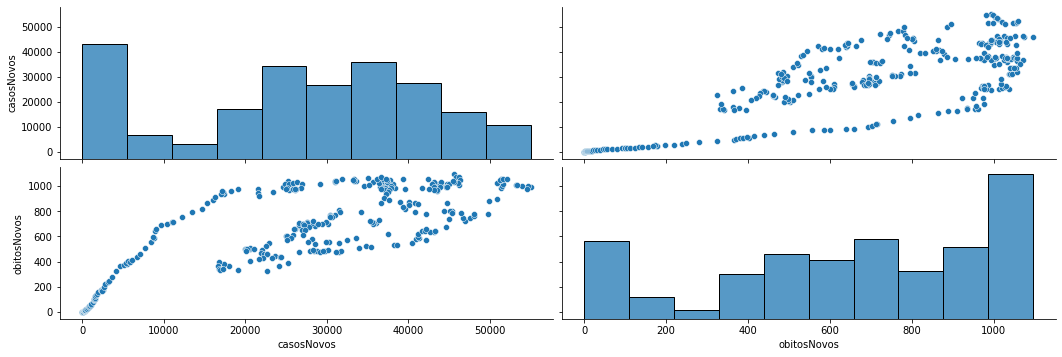

In [8]:
sns.pairplot(covid_brasil_mv, aspect=3)

Pode-se notar uma alta correlação como era de se esperar.

# Predição
### A preparação dos dados de treino e teste se deu pela seguinte sequência:
1. Definição da data atual `current_date`;
2. Definição do intervalo de treino (em dias) `train_interval_days` = 30 dias;
3. Definição do intervalo de teste (em dias) `test_interval_days` = 7 dias;
4. Separando os dados de treino `current_date - 30 dias`
5. Separando os dados de teste `current_date + 7 dias`


```
    Obs: => As datas foram convertidas de formato Datetime para Timestamp (contínuo) antes de utilizadas pelos modelos.
```

In [83]:
current_date = datetime.datetime(2020, 12, 10)
train_interval_days = datetime.timedelta(days=30)
test_interval_days = datetime.timedelta(days=7)


df_train = covid_brasil_mv[current_date-train_interval_days: current_date]
X_train = np.reshape(list(map(datetime.datetime.timestamp, df_train.index)), (-1, 1)) 
y_train = df_train.obitosNovos

df_test = covid_brasil_mv[current_date: current_date+test_interval_days]
X_test = np.reshape(list(map(datetime.datetime.timestamp, df_test.index)), (-1, 1))
y_test = df_test.obitosNovos

print(f' =======  Intevalo de treino: {df_train.index[0]} => {df_train.index[-1]} =======  ')
print(f' =======  Intevalo de teste: {df_test.index[0]} => {df_test.index[-1]} =======  ')

 =======  Intevalo de treino: 2020-11-10 00:00:00 => 2020-12-10 00:00:00 =======  
 =======  Intevalo de teste: 2020-12-10 00:00:00 => 2020-12-17 00:00:00 =======  


## Aplicando regressão linear para prever 7 dias com base nos últimos 30 dias

In [75]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f'R² score = {regressor.score(X_train, y_train)}')

R² score = 0.6381114574067714


In [79]:
y_pred = regressor.predict(X_test)


resultados = pd.DataFrame({
    'Óbitos-Predição': y_pred,
    'Óbitos-Real': y_test,
    'Erro Absoluto': abs(y_pred - y_test)
})
resultados

,Óbitos-Predição,Óbitos-Real,Erro Absoluto
data,,,
2020-12-10,617.261233,642.142857,24.881624
2020-12-11,624.280184,639.000000,14.719816
2020-12-12,631.299136,642.142857,10.843721
2020-12-13,638.318088,637.285714,1.032373
2020-12-14,645.337039,645.428571,0.091532
2020-12-15,652.355991,662.857143,10.501152
2020-12-16,659.374942,677.142857,17.767915
2020-12-17,666.393894,723.142857,56.748963


<AxesSubplot:title={'center':'Predição de óbitos no Brasil por 7 dias'}, xlabel='data'>

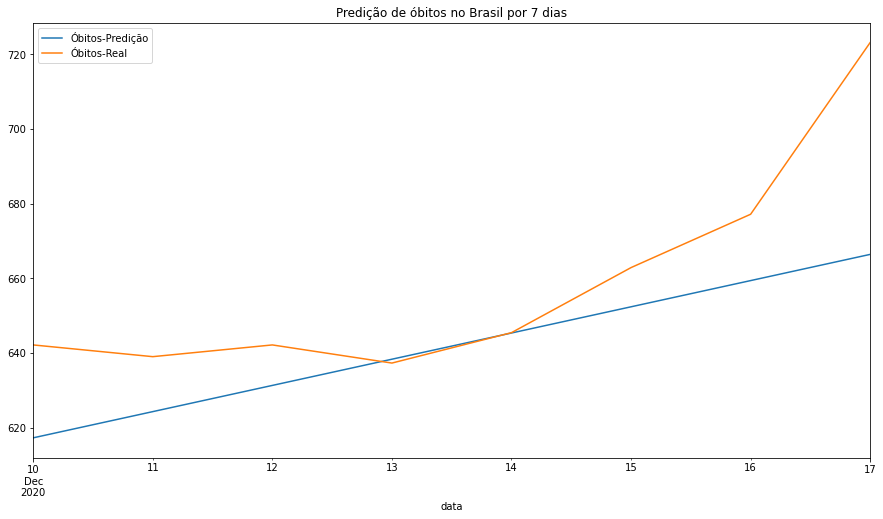

In [86]:
resultados[['Óbitos-Predição', 'Óbitos-Real']].plot(figsize=(15,8), title=f"Predição de óbitos no Brasil por {test_interval_days.days} dias")

In [ ]:
# Polinomial
# SVR